In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
def linear(X,Y):
    X=X.reshape(X.shape[0],1)
    Y=Y.reshape(Y.shape[0],1)
    ones=np.ones(X.shape[0]).reshape(X.shape[0],1)
    X=np.append(ones,X,axis=1)
    xTranspose=X.T
    X_t_X=np.matmul(xTranspose,X)
    if(np.linalg.det(X_t_X)==0):
        X_inv=np.linalg.pinv(X_t_X)
    else:
        X_inv=np.linalg.inv(X_t_X)
    temp=np.matmul(X_inv,xTranspose)
    thetas=np.matmul(temp,Y)
    thetas=thetas
    return thetas

In [138]:
def predict(thetas,x):
    x=x.reshape(x.shape[0],1)
    ones=np.ones(x.shape[0]).reshape(x.shape[0],1)
    x=np.append(ones,x,axis=1)
    values=np.matmul(x,thetas)
    return values

In [139]:
x = np.random.rand(100, 1) * 10  # Random x values in range [0, 10]
y = 2 + 3 * x + x**2 + np.random.randn(100, 1) * 10 
thetas_linear=linear(x,y)
print(linear(x,y))

[[-17.01699725]
 [ 13.4077607 ]]


In [140]:
y_predicted=predict(thetas_linear,x)

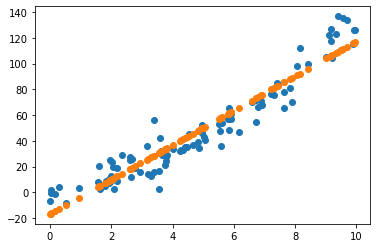

In [141]:
plt.scatter(x,y)
plt.scatter(x,y_predicted)
plt.show()

In [142]:
def polynomial(X,Y,degree):
    X=X.reshape(X.shape[0],1)
    ones=np.ones(X.shape[0]).reshape(X.shape[0],1)
    X=np.append(ones,X,axis=1)
    X=np.repeat(X,[1,degree],axis=1)
    Y=Y.reshape(Y.shape[0],1)
    X=X**np.arange(0,X.shape[1])
    xTranspose=X.T
    X_t_X=np.matmul(xTranspose,X)
    if(np.linalg.det(X_t_X)==0):
        X_inv=np.linalg.pinv(X_t_X)
    else:
        X_inv=np.linalg.inv(X_t_X)
    temp=np.matmul(X_inv,xTranspose)
    thetas=np.matmul(temp,Y)
    thetas=thetas
    return thetas  


In [143]:
def poly_predict(x,thetas):
    degree=thetas.shape[0]-1
    x=x.reshape(x.shape[0],1)
    ones=np.ones(x.shape[0]).reshape(x.shape[0],1)
    x=np.append(ones,x,axis=1)
    x=np.repeat(x,[1,degree],axis=1)
    x=x**np.arange(0,x.shape[1])
    values=np.matmul(x,thetas)
    return values

In [144]:
thetas=polynomial(x,y,2)

In [145]:
y_pred2=poly_predict(x,thetas)

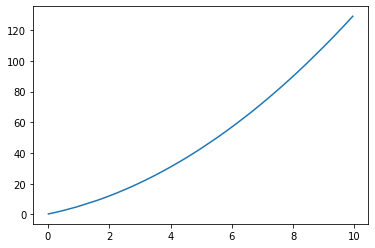

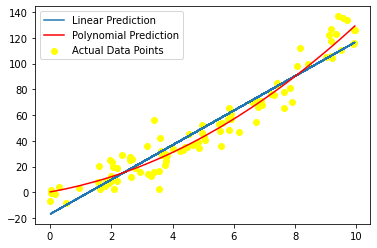

In [157]:
plt.scatter(x,y,color='yellow',label="Actual Data Points")
plt.plot(x,y_predicted,label="Linear Prediction")
plt.plot(np.sort(x, axis=0), np.sort(y_pred2, axis=0),color="red",label="Polynomial Prediction")
plt.legend()
plt.show()